## Requetes nbre de notices dans une collection par auteur doté d'un IdHAL

In [5]:
import pandas as pd, json, requests

In [4]:
def req_idhal(TAMPID, idhal, subtype) :
    """nombre de publication pour telle année pour tel type de dépôt"""
    req = requests.get(f"http://api.archives-ouvertes.fr/search/{TAMPID}/?q=authIdHal_s:{idhal}&rows=0")
    req = req.json()
    num = req['response']['numFound']
    return num

In [6]:
def req_idhal_an(year, TAMPID, idhal, subtype) :
    """nombre de publication pour dans la collection"""
    req = requests.get(f"https://api.archives-ouvertes.fr/search/{TAMPID}/?q=authIdHal_s:{idhal}&fq=submitType_s:{subtype}&rows=0")
    req = req.json()
    tot = req['response']['numFound']
    return tot

Définition de la collection et de la liste d'IdHAL

In [24]:
TAMPID = 'MATH_ENS_PARIS'
idhals = ['annabenhamou', 'bastien-mallein', 'cyril-imbert', 'davidgontier', 'djalil-chafai', 'emmanuel-giroux', 'gaetan-chenevier', 'gpeyre', 'isabelle-gallagher', 'laure-dumaz', 'laurentmoonens', 'moussa', 'nicolas-bergeron', 'olivier-benoist', 'quentin-berger', 'ricardo-grande-izquierdo', 'silvain-rideau-kikuchi', 'zaccharie-ramzi']

Récupération des données

In [25]:
totaux = {}
subtypes = ["total"]
for idhal in idhals:
    totaux[idhal] = {}
    for st in subtypes :
        tot = req_idhal(TAMPID, idhal, st)
        totaux[idhal][st] = tot

In [26]:
data = {}
subtypes = ["file", "notice", "annex"]
for idhal in idhals:
    data[idhal] = {}
    for st in subtypes : 
        num = req_idhal(TAMPID, idhal, st)
        data[idhal][st] = num

Transformation en tableau et graphes

In [30]:
dftot = pd.DataFrame.from_dict(totaux)
df = pd.DataFrame.from_dict(data)
dffin = [df, dftot]
dffin = pd.concat(dffin)
dffin = dffin.T
dffin

,file,notice,annex,total
annabenhamou,0,0,0,0
bastien-mallein,19,19,19,19
cyril-imbert,18,18,18,18
davidgontier,0,0,0,0
djalil-chafai,2,2,2,2
emmanuel-giroux,0,0,0,0
gaetan-chenevier,0,0,0,0
gpeyre,35,35,35,35
isabelle-gallagher,28,28,28,28
laure-dumaz,4,4,4,4


<AxesSubplot:>

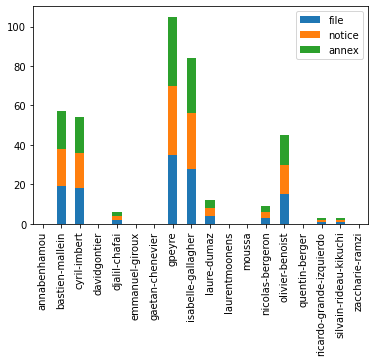

In [28]:
df = df.T # pour inverser colonnes et lignes
df.plot.bar(stacked = True)